# Week 5 - Sampling & Reliability

Up until this week, we have assumed that the corpus you have used for analysis assignments represented a *meaningful* assemblage of texts from which reasonable inferences could be drawn about the social game, social world and social actors that produced it. This week, we ask you to articulate what your sample represents in context of your final project, and draw upon methods we have developed over the last three weeks to draw reasonable and representative samples. 

This week we also pivot from our recent work on unsupervized machine learning approaches to explore how we can get *human* readings of content at scale. We want to gather and utilize human responses for several reasons. First, we may want to use crowdsourced human scores as the primary method of coding, extracting or organizing content (as it was in the two of the assigned readings). Second, we may want to validate or tune a computational algorithm we may have developed in terms of how it is associated with human meanings or experience. Finally, we may want to use human coding on a sample of data as the basis for training a model or algorithm to then extrapolate *human-like* annotations to the entire population. Here intelligent sampling is critical to maximize effective maching training. 

For this notebook we will be using the following packages

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

D:\computation\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## <span style="color:red">*Pitch Your Project*</span>

<span style="color:red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

## ***What?*** 
My final project will explore the place of the Vietnam War in United States political discourse and how it changed in the years between the close of fighting in 1975 (marked by the withdrawal of US forces from Saigon) and the official reconciliation between the two former enemies in 1995 (marked by the mutual extension of diplomatic recognition). More specifically, I am interested in the narrative surrounding Prisoners of War and Missing in Action (POW/MIA), and I am especially interested in how the narrative of ‘live POWs’ (that is, living US prisoners that were held back from official prisoner-swaps in 1973) may (or perhaps, as the case might be, may not) have persisted throughout the 1980s and fizzled out in the 1990s. My intuition is that this narrative closure began when high-profile Vietnam War veterans, such as John Kerry and John McCain (himself a former POW), and the Clinton administration began speaking directly against that narrative in the 1990s. 

## ***Why?***
This final project relates to a planned empirical component of my thesis paper. In my project, I hope to use the case of US-Vietnam postwar reconciliation to challenge a powerful simplifying assumption that runs throughout studies of war in political science – in short, that war and, more important to my investigation, war termination can be conceptualized primarily in terms of body counts. Where much of this literature would code the end of a war as occurring 1) when two parties agree to stop fighting (Reiter 2009), 2) when one side has been utterly destroy (ibid), or 3) after a year has passed without 1000 battle deaths (Correlates of War), I argue that war can continue as a discursive formation long after battlefield killing has ended, that this discursive continuance is the product of emotional dynamics related to war, and that it bears on international politics. 

## ***How?***
My final project for this class will proceed in three stages. First, I will use k-means predictions to cluster documents into possible topics. This stage provides the first cut at seeking empirical validation for my claims; more specifically, I expect (or at least hope) that flat clustering will produce an article cluster that, to an expert coder with prior knowledge of the case, would be viewed as pertaining to POW/MIA issues. This outcome would serve first and foremost as ground-level validation for an investigation of the POW/MIA issue as an identifiable feature of the discourse, but it will also serve to produce the subsample of documents that I will continue using throughout 

Second, I will use word embeddings to explore variation within this cluster over time. For example, if the top word in the cluster is ‘missing’ or ‘remains’, I will explore that embedding over time. If it is the case that there is wide variation, especially in the 1990s, I will take that as positive evidence that elite and state rhetoric had an effect on the discourse.

Third and finally, I will use computational linguistic methods to extract and analyze claims being made within this POW/MIA cluster. In documents from the 1980s I expect to find more claims that leave open the possibility that live POWs are still being kept in Southeast Asia. In documents from the 1990s I expect to find more claims that contest this narrative. For example, I might look for mentions of live prisoners and code whether those mentions appear in the present tense (as I would expect them to in the 1980s). 


## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)? (<200 words).

## ***Which (words)?***
My corpus of documents will be composed of news articles published in The New York Times between 1980 and 2000 and selected for mention of ‘Vietnam.’ These documents fit my purpose because they allow me to make inferences about the POW/MIA discourse and whether everyday Americans were aware of the live POW narrative. Of course, it is the case that elite and state rhetoric also play a role in my investigation, but I will validate claims related to those domains through congressional and presidential documents. 

This sample faces at least two challenges. First, it would be ideal to extend the corpus back to 1970 (or perhaps even earlier), but I have only been able to find abstracts of NYT articles published before 1980 rather than full article text. Second, while the NYT is more or less an uncontroversial choice as a paper of record, it is the case that its readership is not fully representative of US demographics. 

I might be able to overcome both of these challenges by scaling up my sample through the inclusion of more newspapers. I could, for example, include articles from The Wall Street Journal, as representative of a more conservative crowd, and The Boston Globe, as representative of a more liberal crowd. I could also bring in West Coast dailies, such as The LA Times and The San Francisco Chronicle. 


## <span style="color:red">*Exercise 1*</span>

<span style="color:red">In the cells immediately following, demonstrate three approaches drawn from any of the last three weeks to create subsamples of your corpus (e.g., for crowd-sourced subcoding like we'll be doing this week). Methods of subsampling include (a) corpus linguistic approaches drawing on word presence or co-presence, conditional frequencies, weighted words (e.g., tf.idf), KL or JS divergences, etc.; (b) hierarchical or flat clustering approaches; (c) topic modeling; or (d) word-embedding. (<200 words).

In [3]:
# In these cells I explore three possible ways to select a subsumple of documents for my project: corpus linguistics, flat clustering, and topic modeling. 

In [2]:
# load my corpus of interest - All New York Times articles published '80-'89 that mention Vietnam
nyt80s = pandas.read_csv('../data/nyt80s.csv')


In [3]:
# prepare corpus

import nltk

nyt80s['tokenized-article'] = nyt80s.apply(lambda row: nltk.word_tokenize(row['article']), axis=1)

In [4]:
from nltk.corpus import stopwords
stop_words_nltk = stopwords.words('english')
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()


nyt80s['normalized-tokens'] = nyt80s['tokenized-article'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))


In [73]:
# Subsampling with flat clustering.

# There is no 'ground truth' for this corpus. Luckily, in a previous homework I found that 55 clusters is reliable. 

numCategories = 55

import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

nytTFvectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
nytTFvects = nytTFvectorizer.fit_transform(nyt80s['article'])

myKM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
myKM.fit(nytTFvects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=55, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
numClusters = 55

terms = nytTFvectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = myKM.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    try:
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind])
    except IndexError:
        pass
    print('\n')

Top terms per cluster:
Cluster 0:
 music
 museum
 art
 street
 30
 information
 york
 works
 sunday
 theater


Cluster 1:
 type
 letter
 editor
 service
 draft
 old
 died
 military
 york
 university


Cluster 2:
 city
 million
 police
 company
 state
 york
 000
 percent
 federal
 officials


Cluster 3:
 president
 reagan
 press
 administration
 house
 white
 military
 secretary
 officials
 state


Cluster 4:
 nuclear
 weapons
 arms
 soviet
 missiles
 military
 strategic
 union
 defense
 reagan


Cluster 5:
 court
 supreme
 justice
 law
 case
 federal
 judge
 government
 decision
 legal


Cluster 6:
 khmer
 rouge
 cambodia
 prince
 vietnamese
 cambodian
 pol
 pot
 coalition
 government


Cluster 7:
 95
 book
 15
 14
 50
 17
 simon
 16
 12
 novel


Cluster 8:
 mondale
 hart
 campaign
 senator
 democratic
 jackson
 reagan
 president
 party
 voters


Cluster 9:
 thai
 thailand
 vietnamese
 cambodian
 border
 cambodia
 camp
 troops
 refugees
 guerrillas


Cluster 10:
 soviet
 union
 moscow


NameError: name 'nytFilter' is not defined

In [91]:
nyt80s['kmeans_predictions'] = myKM.labels_

In [121]:
# Here are some articles selected for my Mturk survey. These are selected pseudo-randomly - not the best way. 
# In the future I could select them through a random number generator. 

# number correspond to row numbers in the original nyt80s dataframe 

# pow/mia topic articles:
# 108, 8767, 3578, 1725, 2125

# refugee crisis articles:
# 39, 70, 71, 10813, 10554

# entertainment articles
# 445, 458, 1875, 10027, 10165

# MOVE THIS DOWN TO EXERCISE 2 
nyt80s['kmeans_predictions'] = nyt80s['kmeans_predictions'].astype(str)

refugee = nyt80s[nyt80s['kmeans_predictions'].str.contains('9', na = False)]
entertainment = nyt80s[nyt80s['kmeans_predictions'].str.contains('14', na = False)]
powMIA = nyt80s[nyt80s['kmeans_predictions'].str.contains('36', na = False)]


In [127]:
# Subsampling with topic modeling

import gensim #For topic modeling

def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

nyt80s['reduced-tokens'] = nyt80s['normalized-tokens'].apply(lambda x: dropMissing(x, nytTFvectorizer.vocabulary_.keys()))
dictionary = gensim.corpora.Dictionary(nyt80s['reduced-tokens'])
corpus = [dictionary.doc2bow(text) for text in nyt80s['reduced-tokens']]
gensim.corpora.MmCorpus.serialize('nyt.mm', corpus)
nytmm = gensim.corpora.MmCorpus('nyt.mm')
nytlda = gensim.models.ldamodel.LdaModel(corpus=nytmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [84]:
# could maybe delete this

nyt1Bow = dictionary.doc2bow(nyt80s['reduced-tokens'][130])
nyt1lda = nytlda[nyt1Bow]
print("The topics of the text: {}".format(nyt80s['article'][130]))
print("are: {}".format(nyt1lda))

The topics of the text:    US Deputy State Secretary Warren M Christopher denounces refusal of Vietnam and USSR to participate in UN conference, Geneva, on humanitarian aid to Cambodia. Says participants to conference, called by Thailand to speed aid to Cambodia, could not ignore 'broader reality' of overall refugee problem.  Says US is ready to provide $29.6 Million in food and funds over next 4 months in addition to $85 million already pledged.  USSR and Vietnam refused to attend conference, saying session was politically motivated.  Vietnamese-backed Heng Samrin government and ousted Pol Pot regime were not invited to send representatives.  Christopher calls for removal of restrictions on relief workers so that aid can be distributed.  Endorses proposed creation of UN fund for Cambodian relief.  Illus (M).  LANGUAGE: ENGLISH  JOURNAL-CODE:  NYT  TYPE: 147-8  GRAPHIC: Illustrations: Photograph                 
are: [(3, 0.970154)]


In [85]:
ldaDF = pandas.DataFrame({
        'article' : nyt80s['article'],
        'topics' : [nytlda[dictionary.doc2bow(l)] for l in nyt80s['reduced-tokens']]
    })

In [90]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(nytlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(nytlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


In [89]:
topicsDict = {}
for topicNum in range(nytlda.num_topics):
    topicWords = [w for w, p in nytlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,soviet,like,miss,state,reagan,play,state,veteran,student,general
1,state,book,general,aid,democrat,china,york,general,nation,air
2,union,film,court,nation,republican,theater,children,state,say,colonel
3,world,say,cbs,cambodia,state,music,veteran,use,black,report
4,nation,work,case,report,campaign,khmer,million,agent,school,say
5,moscow,life,public,say,say,street,court,percent,church,command
6,power,world,westmoreland,foreign,congress,cambodia,program,chief,member,state
7,america,make,report,guerrilla,nation,say,home,million,public,use
8,foreign,man,lawyer,today,percent,like,work,school,state,case
9,nuclear,live,say,cambodian,bush,open,center,say,work,nation


# Example Annotation Dataset

Load Rzhetsky et al (2009)'s sample dataset, which can be found [here](https://github.com/enthought/uchicago-pyanno/tree/master/data). This data is the result of a content analytic / content extraction study in which Andrey Rzhetsky and colleagues from the National Library of Medicine, published [here](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000391) in [PLOS Computational Biology](http://journals.plos.org/ploscompbiol/), gave eight annotators 10,000 sentence chunks from biomedical text in biomedical abstracts and articles, then asked them, in a loop design schematically illustrated below that provided 3 independent codings for each document. The sampling strategy pursued diversity by drawing from PubMed abstracts (1000) and full-text articles (9000: 20% from abstracts, 10% from introductions, 20% from methods, 25% from results, and 25% from discussions.) The dataset extract here involves respondents codes for sentences in terms of their *Evidence*: {0, 1, 2, 3, -1} where 0 is the complete lack of evidence, 3 is direct evidence present within the sentence, and -1 is didn't respond. (They also crowdsourced and analyzed *polarity*, *certainty*, and *number*). For example, consider the following two abutting sentence chunks: *"Because null mutations in toxR and toxT abolish CT and TcpA expression in the El Tor biotype and also attenuate virulence..."* [i.e., average certainty = 0], *"...it is likely that the ToxR regulon has functional similarities between the two biotypes despite the clear differences in the inducing parameters observed in vitro"* [i.e., average certainty = 1]."

In [5]:
x = np.loadtxt("../data/pyAnno/testdata_numerical.txt")
anno = AnnotationsContainer.from_array(x, missing_values=[-1])

Interrogate the AnnotationsContainer object.

In [6]:
anno.annotations

array([[ 1,  2,  3, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 2,  2,  1, ..., -1, -1, -1],
       ...,
       [ 2,  2, -1, ..., -1, -1,  1],
       [ 2,  2, -1, ..., -1, -1,  3],
       [ 1,  1, -1, ..., -1, -1,  0]])

In [7]:
anno.labels

[1.0, 2.0, 3.0, 4.0]

In [8]:
anno.missing_values

[-1]

# Annotation Statistics

First, we assume categorical codes...that each code is qualitatively distinct from each other. Two measures are primarily used for this: Scott's $\pi$, Cohen's $\kappa$, and Krippendorff's $\alpha$ which each measure the extent of agreement between two annotators, but take into account the possibility of the agreement occurring by chance in slightly different ways. Any agreement measure begins with the frequency of codes:

In [9]:
pyanno.measures.agreement.labels_frequency(anno.annotations,4)

array([0.11666667, 0.245     , 0.34083333, 0.2975    ])

Now consider the "confusion matrix" or matrix of coded agreements between any two coders:

[[ 8.  7.  3.  2.]
 [ 9. 30. 13.  3.]
 [ 2.  9. 42. 11.]
 [ 1.  7. 14. 39.]]


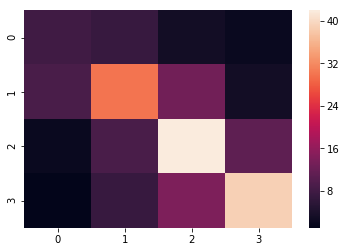

In [10]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],4)
print(c)
ac = seaborn.heatmap(c)
plt.show()

Scott's $\pi$ is computed as:

$\pi = \frac{\text{Pr}(a)-\text{Pr}(e)}{1-\text{Pr}(e)}$

Where Pr($a$) is relative observed agreement, and Pr($e$) is expected agreement using joint proportions calculated from the confusion matrix or matrix of coded agreements between any two coders:

In [11]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

0.4386478265891502

The generalization of Scott's $\pi$ to $n$ coders is Fleiss' $\kappa$ (Fleiss called it $\kappa$ because he thought he was generalizing Cohen's $\kappa$)

In [12]:
fleiss_kappa(anno.annotations[::])

0.40417653771912765

Krippendorff's $\alpha$ generalizes of Fleiss' $\kappa$ to $n$ coders and takes into account the fact that annotations here are not categorically different, but ordinal, by adding a weight matrix in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When produced with no arguments, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc.

In [13]:
krippendorffs_alpha(anno.annotations[::])

0.6472588223831547

Like Scott's $\pi$, Cohen's $\kappa$ also takes into account the possibility of the agreement occurring by chance, but in the following way:

$\kappa = \frac{p_o-p_e}{1-p_e}=1-\frac{1-p_o}{p_e}$

where $p_o$ is the relative observed agreement among raters, and $p_e$ is the hypothetical probability of chance agreement, using the observed data to calculate the probabilities of each observer randomly saying each category. If the raters are in complete agreement then $\kappa = 1$. If there is no agreement among the raters other than what would be expected by chance (as given by $p_e$), $\kappa ≤ 0 $. Here, Cohen's $\kappa$ statistic for the first two annotators is computed. This is probably the most common metric of agreement.

In [14]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.43917037219392857

In [15]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[1.         0.43917037 0.47677621        nan        nan        nan
  0.45819119 0.43381462]
 [0.43917037 1.         0.38432922 0.41344423        nan        nan
         nan 0.33643611]
 [0.47677621 0.38432922 1.         0.39583333 0.51704894        nan
         nan        nan]
 [       nan 0.41344423 0.39583333 1.         0.34597068 0.4446844
         nan        nan]
 [       nan        nan 0.51704894 0.34597068 1.         0.37938644
  0.43039733        nan]
 [       nan        nan        nan 0.4446844  0.37938644 1.
  0.38341929 0.31214748]
 [0.45819119        nan        nan        nan 0.43039733 0.38341929
  1.         0.394806  ]
 [0.43381462 0.33643611        nan        nan        nan 0.31214748
  0.394806   1.        ]]


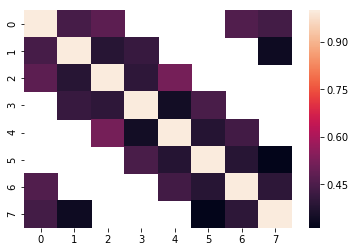

In [16]:
ax = seaborn.heatmap(m)
plt.show()

You can see that this 8 by 3 loop design will be less stable than an 8 choose 3 combinatorial design, because each codes with more others. 

One can also assess the average Cohen's $\kappa$ for all pairs of coders that have coded against one another:

In [17]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

0.40911598940065674

As recognized with Krippendorff's flexible $\alpha$, our scores are *not* categorical, but rather ordered and her considered metric. Weighted $\kappa$ allows you to count disagreements differently and is useful when codes are ordered as they are here. Here a weight matrix is added to the calculation, in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When automatically produced, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc. Here

$\kappa = 1-\frac{\sum^k_{i=1}\sum^k_{j=1}w_{ij}x_{ij}}{\sum^k_{i=1}\sum^k_{j=1}w_{ij}m_{ij}}$

where $\kappa$ = $n$ codes and $w_{ij}$,$x_{ij}$, and $m_{ij}$ represent elements in the weight, observed, and expected matrices, respectively. (Obviously, when diagonal cells contain weights of 0 and off-diagonal cells weights of 1, this equals $\kappa$).

In [18]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.5330240507874497

Or averaged over the total:

In [19]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.5299113458717166

Alternatively, if the annontation data can be understood as indicating real values, we can assess not agreement, but rather the correlation of values (Pearson's $\rho$) or correlation of ranks (Spearman's $\rho$) for pairs of coders:

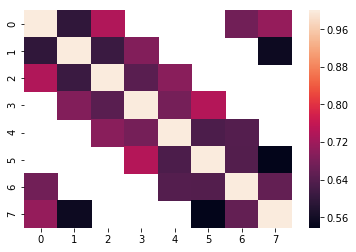

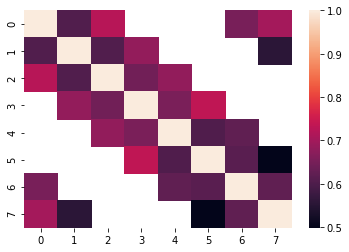

In [20]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

Or averaged over all comparable pairs:

In [21]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

0.6517219321175077 0.63808488688039


## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the MTurk slides on this week's Canvas page.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

In [12]:
# Here are some articles selected for my Mturk survey. These are selected pseudo-randomly - not the best way. 
# In the future I could select them through a random number generator. 

# NB: number correspond to row numbers in the original nyt80s dataframe 

nyt80s['kmeans_predictions'] = nyt80s['kmeans_predictions'].astype(str)

powMIA = nyt80s[nyt80s['kmeans_predictions'].str.contains('36', na = False)]
# pow/mia topic articles for survey:
# 108, 8767, 3578, 1725, 2125

refugee = nyt80s[nyt80s['kmeans_predictions'].str.contains('9', na = False)]
# refugee crisis articles for survey:
# 39, 70, 71, 10813, 10554

entertainment = nyt80s[nyt80s['kmeans_predictions'].str.contains('14', na = False)]
# entertainment articles for survey:
# 445, 458, 1875, 10027, 10165

In [22]:
#load my mturk results
survey = pandas.read_csv('../data/surveyResultsAnswers.csv')

#convert responses to integers
survey.replace('Entertainment', 1, inplace=True)
survey.replace('Refugee Crisis', 2, inplace=True)
survey.replace('Prisoners of War/Missing in Action', 3, inplace=True)
survey.replace('control', 4, inplace=True)
survey.replace('topic not listed', 5, inplace=True)

#drop useless column
survey.drop('Approve', axis=1, inplace=True)

In [23]:
#DOESNT WORK convert column names to article numbers
survey.rename(columns = {'Answer.Topic': 8767}, inplace = True)
survey.rename(columns = {'Answer.Topic1': 3578}, inplace = True)
survey.rename(columns = {'Answer.Topic2': 1725}, inplace = True)
survey.rename(columns = {'Answer.Topic3': 2125}, inplace = True)
survey.rename(columns = {'Answer.Topic4': 39}, inplace = True)
survey.rename(columns = {'Answer.Topic5': 70}, inplace = True)
survey.rename(columns = {'Answer.Topic6': 71}, inplace = True)
survey.rename(columns = {'Answer.Topic7': 10554}, inplace = True)
survey.rename(columns = {'Answer.Topic8': 10813}, inplace = True)
survey.rename(columns = {'Answer.Topic9': 445}, inplace = True)
survey.rename(columns = {'Answer.Topic10': 458}, inplace = True)
survey.rename(columns = {'Answer.Topic11': 1875}, inplace = True)
survey.rename(columns = {'Answer.Topic12': 10027}, inplace = True)
survey.rename(columns = {'Answer.Topic13': 10165}, inplace = True)
survey.rename(columns = {'Answer.Topic14': 108}, inplace = True)

In [5]:
np.savetxt(r'..\data\survey.txt.', survey, fmt='%d')

In [36]:
surv = np.loadtxt("../data/survey.txt")
test = AnnotationsContainer.from_array(surv)

In [37]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, test.annotations)

0.15362109453229453

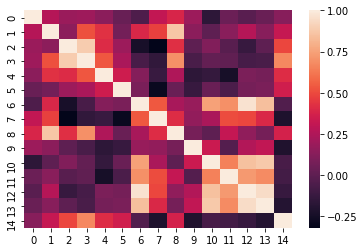

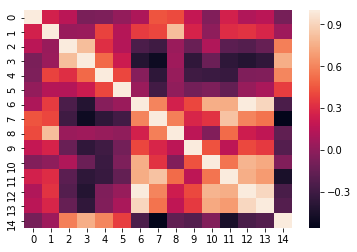

In [12]:
n = pairwise_matrix(pearsons_rho, test.annotations)
m = pairwise_matrix(spearmans_rho, test.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

In [38]:
# it looks as if there is a low degree of inter-coder agreement.
# This could mean that my predicted clusters are do not pass the human eye test,
# that these issues are too niche for human codes (even those with a BA, which is the case for my MTurk sample)
# Or that the topics I gave to these clusters were off base.

print(pairwise_metric_average(pearsons_rho,test.annotations), pairwise_metric_average(spearmans_rho,test.annotations))

0.21005045204967399 0.16349790392838776


# Models

However, what if some coders are better than others. The prior measures all rely on the assumption that all coders are equally good. What if some are worse than others? Now we use Rzhetsky et al (2009) and Dawid & Skene's models to make inference about true label classes by downweighting bad or deviant coders. Pyanno provides two relevant models: ModelB and ModelBt. Model B with $\theta$s models the relationship between each coder and code. Model B is a Bayesian generalization of the Dawid & Skene model from the reading. The following image schematically describes these models. <img src="../data/pyanno/Bmodel.png">

The models should provide very similar results. To estimate the parameters for any models, we first need to create a new model. 

In [22]:
# create a new instance of model B, with 4 label classes
model = ModelB.create_initial_state(4,8)
# other model parameters are initialized from the model prior
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[6.61461017e-01 6.90166013e-02 9.93505607e-02 1.70171820e-01]
  [9.48663428e-02 6.15235067e-01 1.16363181e-01 1.73535409e-01]
  [1.66627879e-02 7.82959655e-02 8.18085515e-01 8.69557314e-02]
  [7.10658757e-02 1.76831032e-01 1.64689054e-01 5.87414038e-01]]

 [[6.93663899e-01 1.86681807e-01 9.12659932e-02 2.83883004e-02]
  [7.53043114e-02 7.48358385e-01 1.14996642e-01 6.13406615e-02]
  [5.79206743e-02 1.23687880e-01 7.77077373e-01 4.13140729e-02]
  [9.46641202e-02 1.32795480e-01 2.70032952e-01 5.02507447e-01]]

 [[7.21591360e-01 2.11246706e-01 8.19584460e-03 5.89660903e-02]
  [1.47989812e-01 7.47064411e-01 4.79726771e-02 5.69731001e-02]
  [4.50247633e-02 1.45717449e-01 6.51669555e-01 1.57588232e-01]
  [9.75203177e-03 8.75058755e-02 7.34359984e-02 8.29306094e-01]]

 [[7.92115374e-01 1.27649571e-01 4.64593952e-02 3.37756605e-02]
  [1.32675650e-01 6.53099979e-01 1.49207116e-01 6.50172547e-02]
  [1.96854229e-01 2.57787448e-01 4.21150092e-01 1.24208231e-01]
  [2.90370925e-02 1.16370363e-01 1

Now we train the model on our data. Pyanno allows one to use either MAP (maximum a posteriori estimation) or MLE (maximum likelihood estimation) to estimate model parameters. Note that the parameters here correspond to our estimation of the accuracy of each annotator-annotation pair. First we will train with MAP, and then you can optionally training with MLE.

In [40]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

NameError: name 'model' is not defined

In [24]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[7.73398728e-01 2.01020245e-01 2.55810269e-02 1.20101219e-26]
  [1.47832659e-01 7.11503767e-01 7.66499157e-02 6.40136580e-02]
  [1.97431020e-02 1.48708709e-01 6.96639326e-01 1.34908863e-01]
  [2.52463780e-18 2.13647377e-02 8.51550428e-02 8.93480220e-01]]

 [[7.19395465e-01 2.01828761e-01 7.87757734e-02 1.55486964e-13]
  [1.33941799e-01 7.07223261e-01 1.10418200e-01 4.84167403e-02]
  [2.72093282e-02 1.65178369e-01 6.71232700e-01 1.36379603e-01]
  [2.15358721e-30 5.38211823e-02 1.21871740e-01 8.24307077e-01]]

 [[8.50073137e-01 1.22955501e-01 2.69713621e-02 3.64395738e-42]
  [8.93514251e-02 7.89280333e-01 8.93429608e-02 3.20252811e-02]
  [6.11638366e-02 1.29121422e-01 7.03992731e-01 1.05722011e-01]
  [6.53666390e-03 5.12606512e-02 2.10869595e-01 7.31333090e-01]]

 [[6.99612801e-01 2.70976969e-01 2.94102301e-02 8.57899704e-52]
  [9.67171336e-02 7.62615701e-01 1.09523823e-01 3.11433425e-02]
  [1.81150586e-02 1.45472330e-01 6.85587954e-01 1.50824657e-01]
  [2.71897111e-47 2.98511124e-02 2

Uncomment the cell below if you would rather train by MLE.

In [25]:
#model = ModelB.create_initial_state(4,8)
#model.mle(anno.annotations)
#print(model.theta)
#print(model.log_likelihood(anno.annotations))

Once we have model parameters estimated, we can now make inferences about the true label classes. We can calculate the posterior distribution over the true label classes.

In [39]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

NameError: name 'model' is not defined

Let's turn the posterior of the first 100 samples into a heatmap and compare with the raw vote tallies.

In [27]:
def makeQuestionComparison(model, anno_target, num_questions = 20):
    votes = []
    for r in anno_target.annotations:
        v = [0] * len(anno_target.labels)
        votes.append(v)
        for a in r:
            if a > -1:
                v[a] += 1
    votes_array = np.array(votes)
    posterior = model.infer_labels(anno_target.annotations)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)

    seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
    seaborn.heatmap(np.nan_to_num(posterior,0)[:num_questions], annot=True, ax =ax1)
    ax1.set_title("Model")
    ax2.set_title("Votes")
    return fig, (ax1, ax2)

(<matplotlib.figure.Figure at 0x2a04f24fe80>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x2a04f2ca7f0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2a04f7af400>))

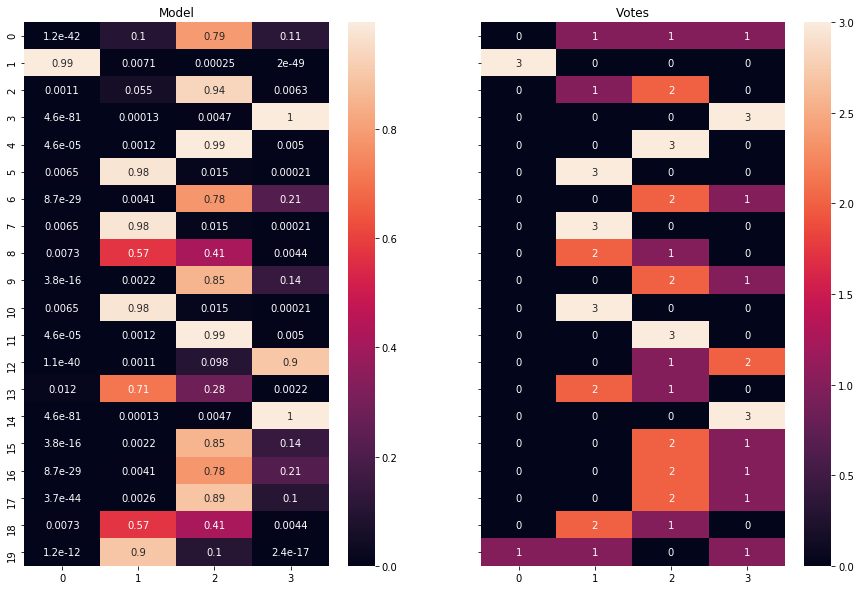

In [28]:
makeQuestionComparison(model, anno)

This differs markedly from taking annotator scores at face value. As you can see (the model-based probabilities are on left; the raw votes on right), the models helps us break ties between coders and in some cases dramatically downgrades the estimates from particularly bad coders.

Let's try everything again with ModelBt, which constrains ModelB so that each coder has a single estimate over the accuracy of all of their codes.

In [29]:
# create a new instance of model B, with 4 label classes and 8 annotators.
model = ModelBt.create_initial_state(4, 8)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.87505106 0.8165264  0.60496981 0.60072887 0.68122503 0.60321895
 0.60142641 0.81242818]
-3271.748727318378


In [30]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.79117384 0.74073236 0.76225445 0.72523344 0.71652558 0.71860056
 0.77323173 0.71671461]
-2811.9463618009263


In [31]:
model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

array([[0.72092235, 0.74900052, 0.73673184, ..., 0.71122017, 0.70589958,
        0.71528493],
       [0.75367273, 0.74430606, 0.72154852, ..., 0.72940282, 0.73223197,
        0.77550395],
       [0.75367273, 0.74430606, 0.72154852, ..., 0.72940282, 0.73223197,
        0.77550395],
       ...,
       [0.81783748, 0.74658036, 0.73970686, ..., 0.73571745, 0.77465349,
        0.72207604],
       [0.81783748, 0.74658036, 0.73970686, ..., 0.73571745, 0.77465349,
        0.72207604],
       [0.80652491, 0.72405183, 0.75016712, ..., 0.70018104, 0.79403611,
        0.71074508]])

In [32]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

[[0.01110618 0.28912025 0.36502274 0.33475083]
 [0.99021582 0.00242038 0.00405228 0.00331151]
 [0.00250171 0.05511269 0.93454615 0.00783945]
 ...
 [0.00253113 0.0440011  0.94553613 0.00793164]
 [0.00249602 0.00571681 0.93242086 0.0593663 ]
 [0.03193338 0.93874927 0.01613327 0.01318408]]


Let's visualize the posterior of the first 10 samples according to ModelBt.

(<matplotlib.figure.Figure at 0x2a04ef8fb00>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x2a04f846e48>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2a04fd4c4e0>))

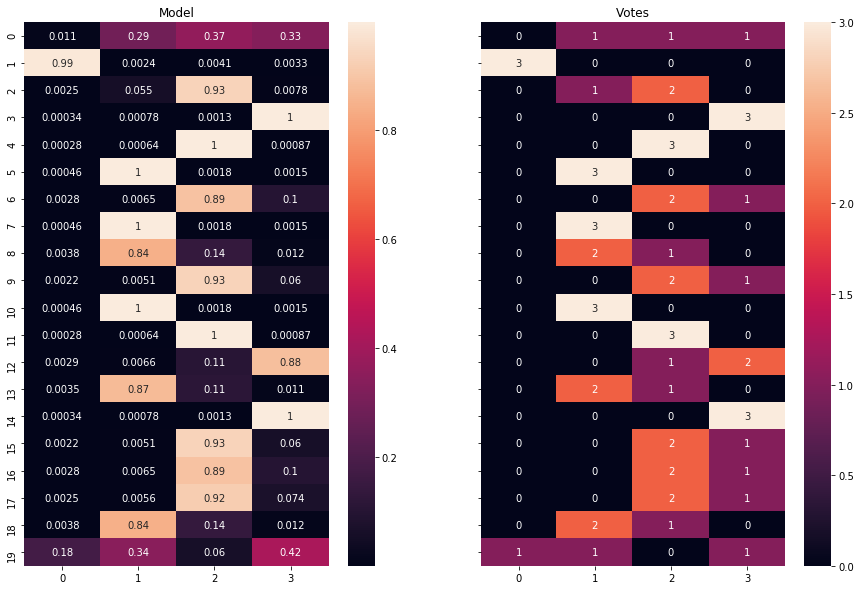

In [33]:
makeQuestionComparison(model, anno)

The property of these scores is that they enable us to identify the most likely code assuming coders of unequal quality, which also allows us to break ties when we know coder identity. We may also use the posterior themselves rather than the most probably code outcome.

## Visualizing coder accuracy

Let's make a plot of the accuracy for each annotator inferred from ModelBt. This might be helpful if you wanted to ban a "troll" from your crowdsourcing enterprise. The coder a very low accuracy likelihood is an outlier and should be "dropped from the team."

In [34]:
model = ModelBt.create_initial_state(4,8)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)
y_ci = samples.std(axis=0)

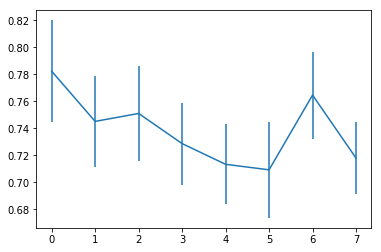

In [35]:
plt.figure()
plt.errorbar(range(8),y, yerr = y_ci)
plt.show()

# Hotel Reviews

If we want to do a simpler analysis we can look at a different data set, here are some hotel reviews from [expedia](https://www.kaggle.com/c/expedia-hotel-recommendations)

In [36]:
df_hotels = pandas.read_csv('../data/hot_Reviews.csv', index_col=0)
df_hotels[:5]

,Karen,Scott,Jessica,write a review,A verified traveler,Kevin,William,R,S,Christopher,...,Thomas,Susan,A Traveler,M,Not Provided,B,Laura,xxxxxxxxxxxxxx,Michael,Joseph
1785 Inn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900 House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bed & Breakfast In Cambridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Swallow's Nest Motel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abbeville Inn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here a rank of 0 is a missing value and to simplify things more we will convert from a 1-10 scale to a 1-5 scale, with 0 as missing

In [37]:
df_hotels = df_hotels.apply(lambda x: x // 2) #integer divide by 2 rounds all values

And we can visualize all the reviews as a heatmap with the missing values greyed out

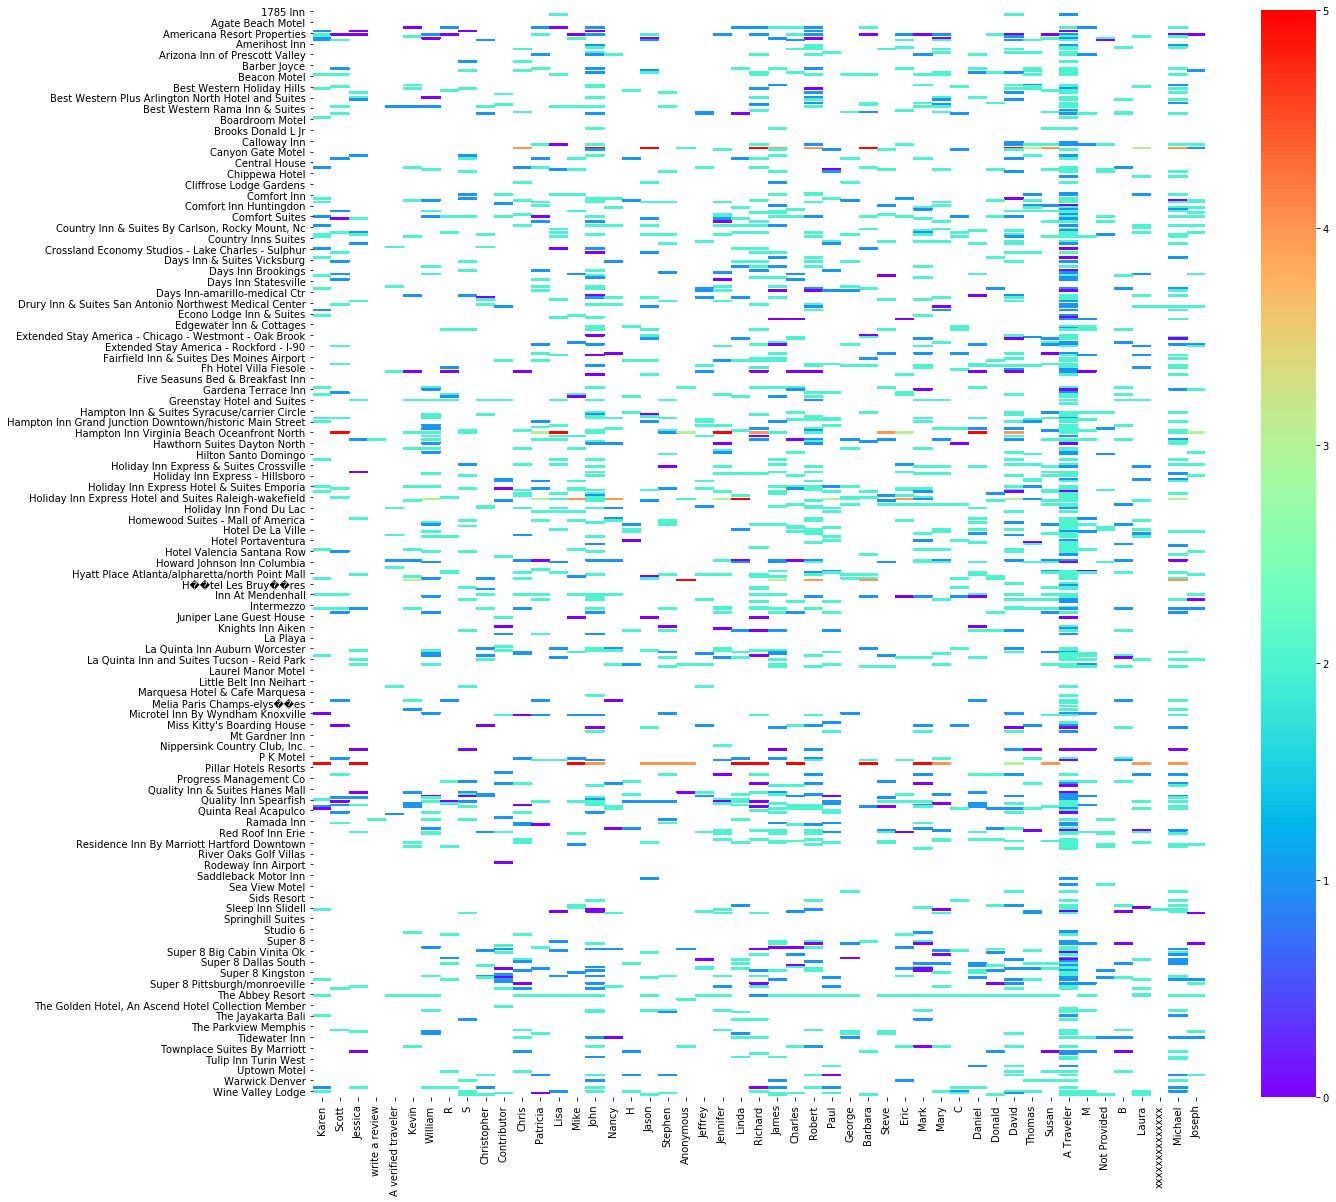

In [38]:
fig, ax = plt.subplots(figsize = (20,20))
seaborn.heatmap(df_hotels, cmap='rainbow', ax = ax)
plt.show()

To give the dataframe to pyanno we need to convert to np array and change the nans to intergers, lets use -1

In [39]:
hot_mat = np.array(df_hotels.fillna(-1).as_matrix())
anno_hot = AnnotationsContainer.from_array(hot_mat, missing_values=[-1])

In [40]:
anno_hot.annotations

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [41]:
anno_hot.labels

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [42]:
anno_hot.missing_values

[-1]

Look at coder agreement

In [43]:
pyanno.measures.agreement.labels_frequency(anno_hot.annotations, 6)#6 possible catagories

array([0.07806534, 0.26262198, 0.63555367, 0.00636402, 0.0093339 ,
       0.00806109])

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


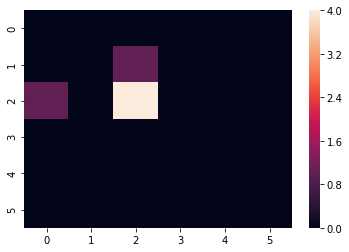

In [44]:
c = pyanno.measures.agreement.confusion_matrix(anno_hot.annotations[:,0], anno_hot.annotations[:,1], 6) #6 possible catagories
print(c)
ac = seaborn.heatmap(c)
plt.show()

Most agreement is on 2 i.e. an average hotel and there's little agreement as rating go higher, likely due to scarcity in the sample

In [45]:
scotts_pi(anno_hot.annotations[:,0], anno_hot.annotations[:,1])

0.3787878787878787

In [46]:
krippendorffs_alpha(anno_hot.annotations[::])

0.398760907615921

In [47]:
cohens_kappa(anno_hot.annotations[:,0], anno_hot.annotations[:,1])

0.40328336902212697

D:\computation\Anaconda3\lib\site-packages\pyanno\measures\helpers.py:166: RuntimeWarning: invalid value encountered in double_scalars
  return (observed_agreement - chance_agreement) / (1. - chance_agreement)


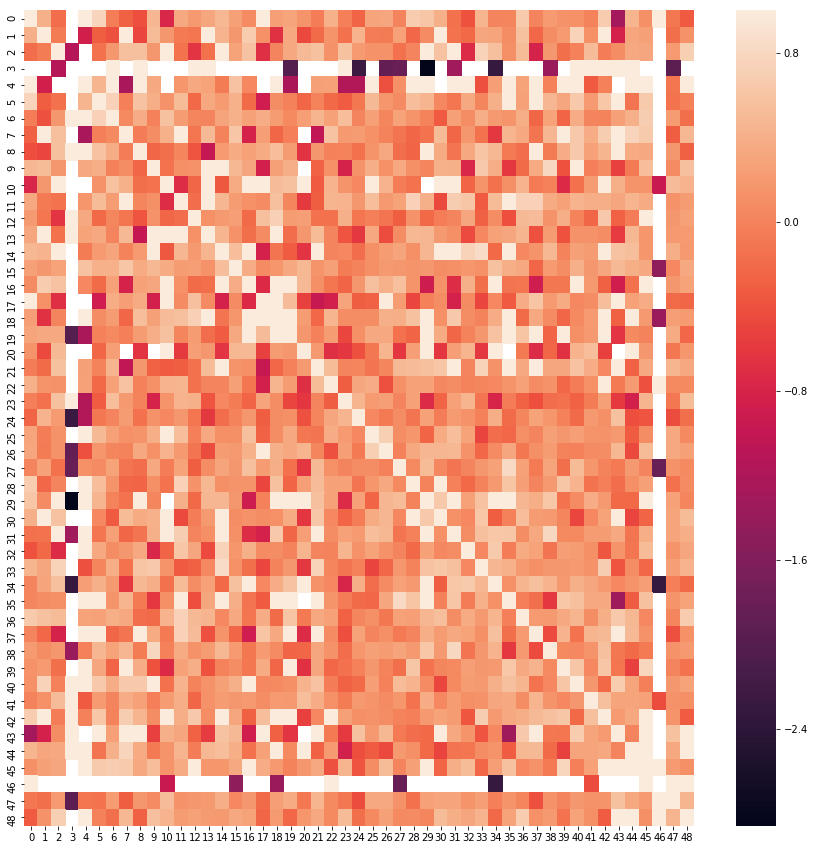

In [48]:
m = pairwise_matrix(cohens_kappa, anno_hot.annotations)
fig, ax = plt.subplots(figsize = (15, 15))
seaborn.heatmap(m, ax =ax)

And to look at what model Bt thinkgs the correct reviews are:

In [49]:
model_hot = ModelBt.create_initial_state(6, 49)
model_hot.mle(anno_hot.annotations)
#print(model.theta)
print(model_hot.log_likelihood(anno_hot.annotations))

-2757.0919777993377


(<matplotlib.figure.Figure at 0x2a04f4dbc50>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x2a0586a0e80>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2a0586fa9e8>))

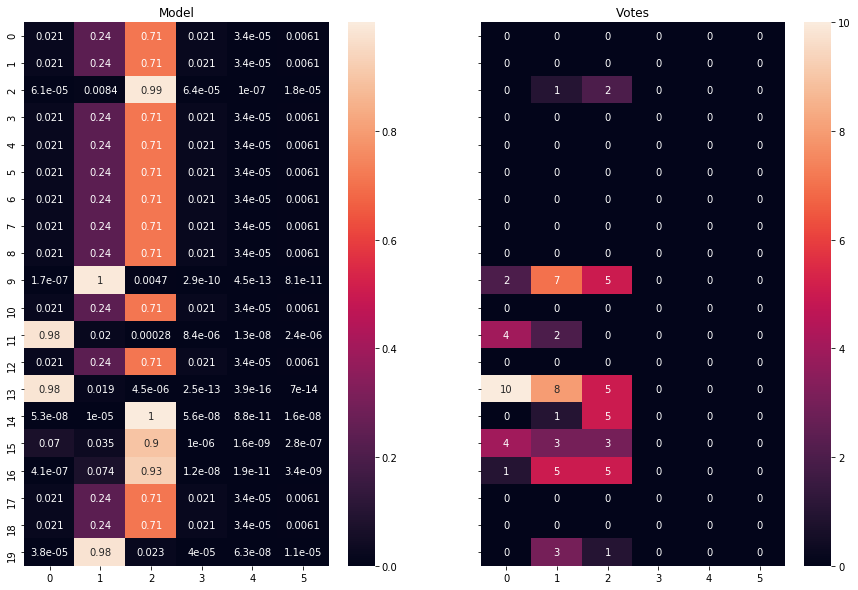

In [50]:
makeQuestionComparison(model_hot, anno_hot)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, use the results of your content annotation survey to predict high and low-quality analysts, then predict MLE or MAP estimates for your codes in question. What do these estimates suggest about the distribution of skill among your coders? How different are these estimates from a majority vote?

In [43]:
myModel = ModelB.create_initial_state(5, 15)

In [44]:
mySamples = myModel.sample_posterior_over_accuracy(test.annotations, 30, burn_in_samples=15, thin_samples=2)

In [45]:
myModel.map(test.annotations)

D:\computation\Anaconda3\lib\site-packages\pyanno\util.py:80: RuntimeWarning: divide by zero encountered in log
  log_theta = ninf_to_num(log(theta))


In [46]:
myPosterior = myModel.infer_labels(test.annotations)

In [47]:
def makeQuestionComparison(model, anno_target, num_questions = 15):
    votes = []
    for r in anno_target.annotations:
        v = [0] * len(anno_target.labels)
        votes.append(v)
        for a in r:
            if a > -1:
                v[a] += 1
    votes_array = np.array(votes)
    posterior = model.infer_labels(anno_target.annotations)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)

    seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
    seaborn.heatmap(np.nan_to_num(posterior,0)[:num_questions], annot=True, ax =ax1)
    ax1.set_title("Model")
    ax2.set_title("Votes")
    return fig, (ax1, ax2)

(<matplotlib.figure.Figure at 0x2097b1d2160>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x2097b1a9860>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2097b1fba20>))

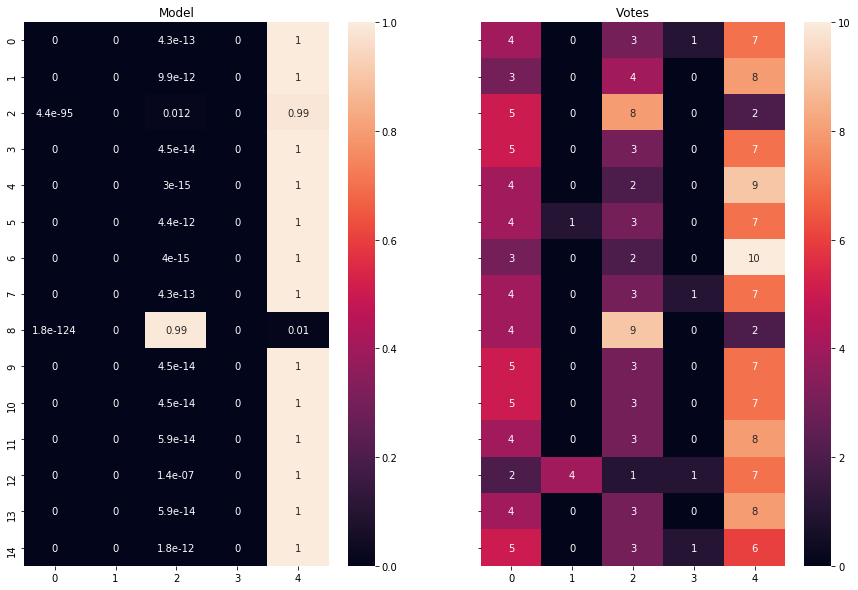

In [48]:
makeQuestionComparison(myModel, test)

In [49]:
newModel = ModelBt.create_initial_state(5, 15)
newModel.mle(test.annotations)
samples = newModel.sample_posterior_over_accuracy(test.annotations, 30, burn_in_samples=15, thin_samples=2)
x = samples.mean(axis=0)
x_ci = samples.std(axis=0)

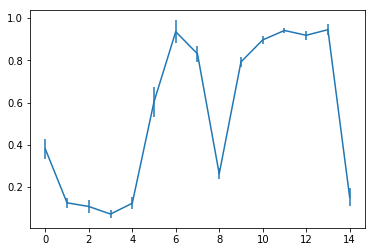

In [50]:
plt.figure()
plt.errorbar(range(15), x, yerr = x_ci)
plt.show()

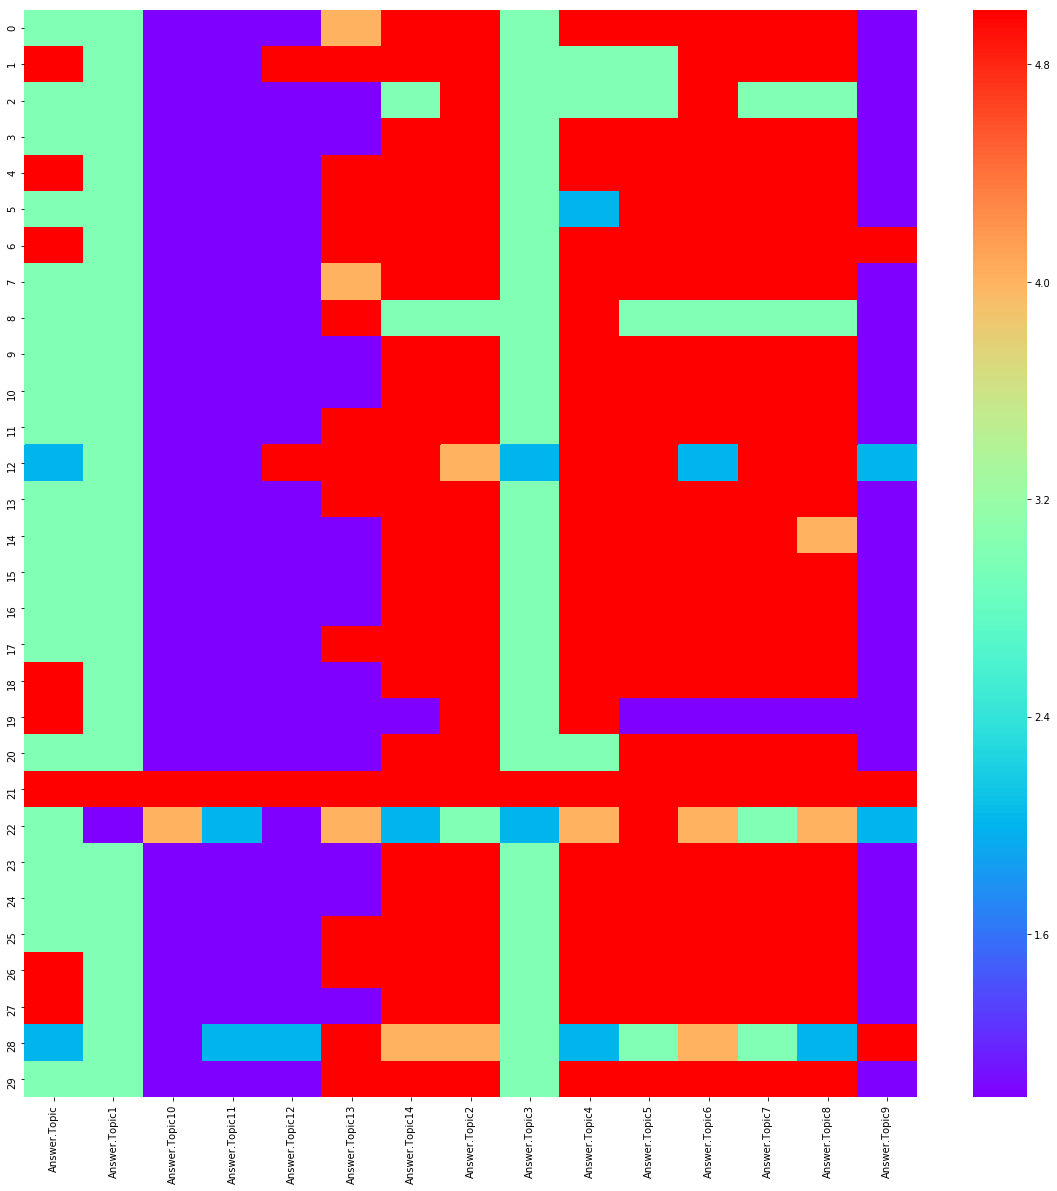

In [4]:
# WORKING FROM HOTEL REVIEWS EXAMPLE
ig, ax = plt.subplots(figsize = (20,20))
seaborn.heatmap(survey, cmap='rainbow', ax = ax)
plt.show()

In [30]:
# For my own research, I'm most interested in how respondents coded articles 
# from the POW/MIA cluster. Let's see what happens when I filter for those.

# Expectation: If everyone is 'expert coder' lever, and if the clustering
# is accurate, almost every article should be coded as 3.

# But, just glancing at the way it was printed below, it does look like 
# there's quite a lot of variance. 

# What happens when I explore it further?

# pow/mia topic articles for survey:
# 108, 8767, 3578, 1725, 2125

miaSurvey = survey[[108, 8767, 3578, 1725, 2125]]
print(miaSurvey)

    108   8767  3578  1725  2125
0      5     3     3     5     3
1      5     5     3     5     3
2      3     3     3     5     3
3      5     3     3     5     3
4      5     5     3     5     3
5      5     3     3     5     3
6      5     5     3     5     3
7      5     3     3     5     3
8      3     3     3     3     3
9      5     3     3     5     3
10     5     3     3     5     3
11     5     3     3     5     3
12     5     2     3     4     2
13     5     3     3     5     3
14     5     3     3     5     3
15     5     3     3     5     3
16     5     3     3     5     3
17     5     3     3     5     3
18     5     5     3     5     3
19     1     5     3     5     3
20     5     3     3     5     3
21     5     5     5     5     5
22     2     3     1     3     2
23     5     3     3     5     3
24     5     3     3     5     3
25     5     3     3     5     3
26     5     5     3     5     3
27     5     5     3     5     3
28     4     2     3     4     3
29     5  

In [31]:
hot_mat = np.array(miaSurvey.fillna(-1).as_matrix())
anno_hot = AnnotationsContainer.from_array(hot_mat, missing_values=[-1])

In [33]:
# a reminder of the labels
# NB - no missing values!
anno_hot.labels

[1, 2, 3, 4, 5]

In [51]:
# looks like respondents were batting just over .500 on this selection...
# vs. the predicted clusters, that is.
pyanno.measures.agreement.labels_frequency(anno_hot.annotations, 5)

array([0.01333333, 0.03333333, 0.52666667, 0.02      , 0.40666667])